In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/train.csv")

df.shape

(3960, 82)

In [3]:
# for index, column in enumerate(df.columns):
#     print(index, column)

pciat = df.loc[:, "PCIAT-Season":"PCIAT-PCIAT_Total"]


pciat["sii"] = df["sii"]


pciat.shape
for col in pciat.columns:
    print(col)



PCIAT-Season
PCIAT-PCIAT_01
PCIAT-PCIAT_02
PCIAT-PCIAT_03
PCIAT-PCIAT_04
PCIAT-PCIAT_05
PCIAT-PCIAT_06
PCIAT-PCIAT_07
PCIAT-PCIAT_08
PCIAT-PCIAT_09
PCIAT-PCIAT_10
PCIAT-PCIAT_11
PCIAT-PCIAT_12
PCIAT-PCIAT_13
PCIAT-PCIAT_14
PCIAT-PCIAT_15
PCIAT-PCIAT_16
PCIAT-PCIAT_17
PCIAT-PCIAT_18
PCIAT-PCIAT_19
PCIAT-PCIAT_20
PCIAT-PCIAT_Total
sii


In [4]:


for col in pciat.columns:
    na = pciat[col].isna().sum()
    print(f"Column {col}: {na}")

Column PCIAT-Season: 1224
Column PCIAT-PCIAT_01: 1227
Column PCIAT-PCIAT_02: 1226
Column PCIAT-PCIAT_03: 1229
Column PCIAT-PCIAT_04: 1229
Column PCIAT-PCIAT_05: 1231
Column PCIAT-PCIAT_06: 1228
Column PCIAT-PCIAT_07: 1231
Column PCIAT-PCIAT_08: 1230
Column PCIAT-PCIAT_09: 1230
Column PCIAT-PCIAT_10: 1227
Column PCIAT-PCIAT_11: 1226
Column PCIAT-PCIAT_12: 1229
Column PCIAT-PCIAT_13: 1231
Column PCIAT-PCIAT_14: 1228
Column PCIAT-PCIAT_15: 1230
Column PCIAT-PCIAT_16: 1232
Column PCIAT-PCIAT_17: 1235
Column PCIAT-PCIAT_18: 1232
Column PCIAT-PCIAT_19: 1230
Column PCIAT-PCIAT_20: 1227
Column PCIAT-PCIAT_Total: 1224
Column sii: 1224


In the block below I'm looking at missing values: how much are missing from all PCIAT, how much are missing in each PCIAT_X in addition to that, and what the distribution of those xtra missing values is

0     2671
1       52
2        9
3        1
5        1
10       1
20       1
23    1224
Name: count, dtype: int64
PCIAT-Season: 0 missing values
PCIAT-PCIAT_01: 3 missing values
PCIAT-PCIAT_02: 2 missing values
PCIAT-PCIAT_03: 5 missing values
PCIAT-PCIAT_04: 5 missing values
PCIAT-PCIAT_05: 7 missing values
PCIAT-PCIAT_06: 4 missing values
PCIAT-PCIAT_07: 7 missing values
PCIAT-PCIAT_08: 6 missing values
PCIAT-PCIAT_09: 6 missing values
PCIAT-PCIAT_10: 3 missing values
PCIAT-PCIAT_11: 2 missing values
PCIAT-PCIAT_12: 5 missing values
PCIAT-PCIAT_13: 7 missing values
PCIAT-PCIAT_14: 4 missing values
PCIAT-PCIAT_15: 6 missing values
PCIAT-PCIAT_16: 8 missing values
PCIAT-PCIAT_17: 11 missing values
PCIAT-PCIAT_18: 8 missing values
PCIAT-PCIAT_19: 6 missing values
PCIAT-PCIAT_20: 3 missing values
PCIAT-PCIAT_Total: 0 missing values
sii: 0 missing values
2 11


Text(0, 0.5, 'Number of Columns')

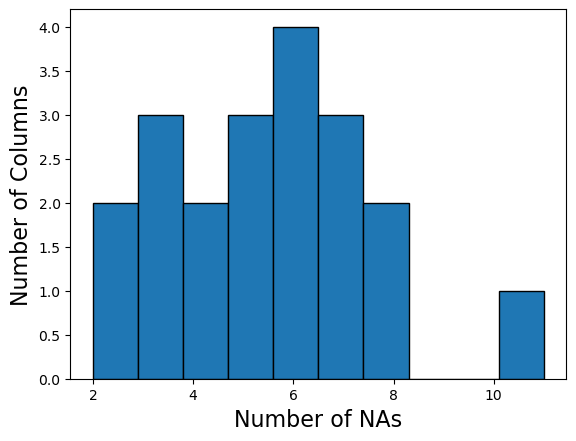

In [5]:
# Checking how much overlap of NA between observations by counting number of columns with number of missing values

# it seems apart from rogue NAs here and there, there are 1224 missing observations 

import matplotlib.pyplot as plt

missing_per_row = pciat.isna().sum(axis=1)
missing_value_dist = missing_per_row.value_counts().sort_index()

print(missing_value_dist)

na_vals = []
for col in pciat.columns:
    count = (pciat[col].isna().sum())-1224
    if count != 0:
        na_vals.append(count)
    else:
        pass
    print(f"{col}: {count} missing values" )

# print(missing_value_dist) 
print(min(na_vals), max(na_vals))


plt.hist(na_vals, edgecolor='black')
plt.xlabel("Number of NAs", fontsize=16)
plt.ylabel("Number of Columns", fontsize=16)



In [27]:
pciat.head

<bound method NDFrame.head of       PCIAT-Season  PCIAT-PCIAT_01  PCIAT-PCIAT_02  PCIAT-PCIAT_03  \
0              NaN             5.0             4.0             4.0   
1              NaN             0.0             0.0             0.0   
2              NaN             5.0             2.0             2.0   
3              NaN             4.0             2.0             4.0   
4              NaN             NaN             NaN             NaN   
...            ...             ...             ...             ...   
3955           NaN             3.0             3.0             3.0   
3956           NaN             NaN             NaN             NaN   
3957           NaN             5.0             5.0             3.0   
3958           NaN             2.0             1.0             1.0   
3959           NaN             NaN             NaN             NaN   

      PCIAT-PCIAT_04  PCIAT-PCIAT_05  PCIAT-PCIAT_06  PCIAT-PCIAT_07  \
0                0.0             4.0             0.0     

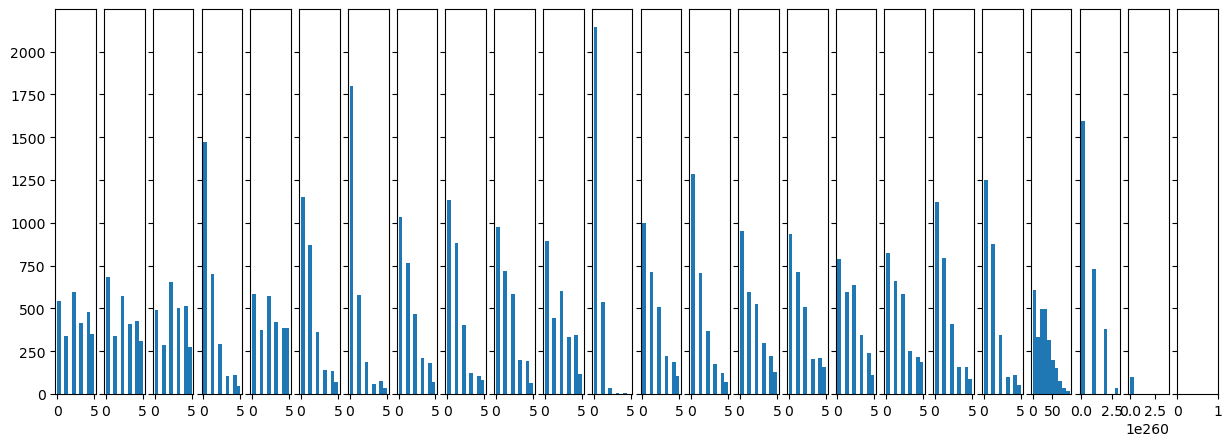

In [29]:
for column in pciat.columns[1:]:
    pciat[column] = pd.to_numeric(pciat[column], errors='coerce')
    
fig, axes = plt.subplots(1, len(pciat.columns), figsize=(15, 5), sharey=True)
for i, column in enumerate(pciat.columns[1:]):
    axes[i].hist(df[column])


Text(0, 0.5, 'n')

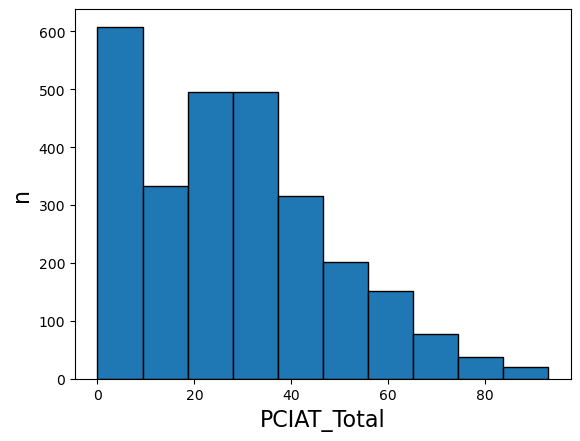

In [11]:
plt.hist(df["PCIAT-PCIAT_Total"], edgecolor='black')
plt.xlabel("PCIAT_Total", fontsize=16)
plt.ylabel("n", fontsize=16)

In [6]:
# From this can see that the PCIAT-PCIAT_Total range is 0-93 (plus nan)

unique_total = np.sort(pciat["PCIAT-PCIAT_Total"].unique())

# Can see the range of each sii value by running the code below: 

sii_vals = [0.0, 1.0, 2.0, 3.0]

for val in sii_vals:
    pciat_vals = np.sort(pciat[pciat["sii"]==val]["PCIAT-PCIAT_Total"].unique())
    print(f"sii {val}: PCIAT range {min(pciat_vals)}-{max(pciat_vals)}")

sii 0.0: PCIAT range 0.0-30.0
sii 1.0: PCIAT range 31.0-49.0
sii 2.0: PCIAT range 50.0-79.0
sii 3.0: PCIAT range 80.0-93.0


Back to the missing values: let's decide what to do with the missing ones. We saw above that, for some observations, we have a PCIAT_Total and hence a sii score even if the value is missing. I'd like to check how this is treated: is the total score just a sum of remaining values? In which case it biases it as artificially "deflates" values. These values could be removed if dealing with only Total / sii as target values; but kept otherwise if we use PCIAT

In [7]:
#  First, let's get rid of obervations where all values are NAs - same as NA in sii
pciat["id"] = df["id"]

#  Get IDs where ALL values missing - also export as txt file! 
all_na_ids = pciat[pciat["sii"].isna()]["id"]
# all_na_ids.to_csv('all_na_ids.txt', index=False, header=False)

# Make a new df where these "total missing" observations are filtered out

pciat_cleaned = pciat[~pciat["id"].isin(all_na_ids)]

count = pciat_cleaned.loc[:, "PCIAT-PCIAT_01":"PCIAT-PCIAT_20"].sum(axis=1).astype(int) == pciat_cleaned["PCIAT-PCIAT_Total"].astype(int)
count.sum()



2736